### **Boston Housing Price Prediction using Multivariate Linear Regression**

**Data Dictionary**

| Column | Description |
|:-|:-|
| CRIM | per capita crime rate by town |
| ZN | proportion of residential land zoned for lots over 25.000 square feet |
| INDUS | proportion of non-retail business acres per town |
| CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX | nitric oxides concentration (parts per 10 million) |
| RM | average number of rooms per dwelling |
| AGE | proportion of owner-occupied units built prior to 1940 |
| DIS | weighted distances to five Boston employment centres |
| RAD | index of accessibility to radial highways |
| TAX | full-value property-tax rate per \$10,000 |
| PTRATIO | pupil-teacher ratio by town |
| B | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| LSTAT | % lower status of the population |
| MEDV | Median value of owner-occupied homes in \$1000's |

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set_style('darkgrid')

### Load Data

In [3]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df = pd.read_csv('https://raw.githubusercontent.com/dzniel/datasets/main/housing.csv', header=None, sep='\s+', names=names)
df.shape

(506, 14)

### Data Exploration

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

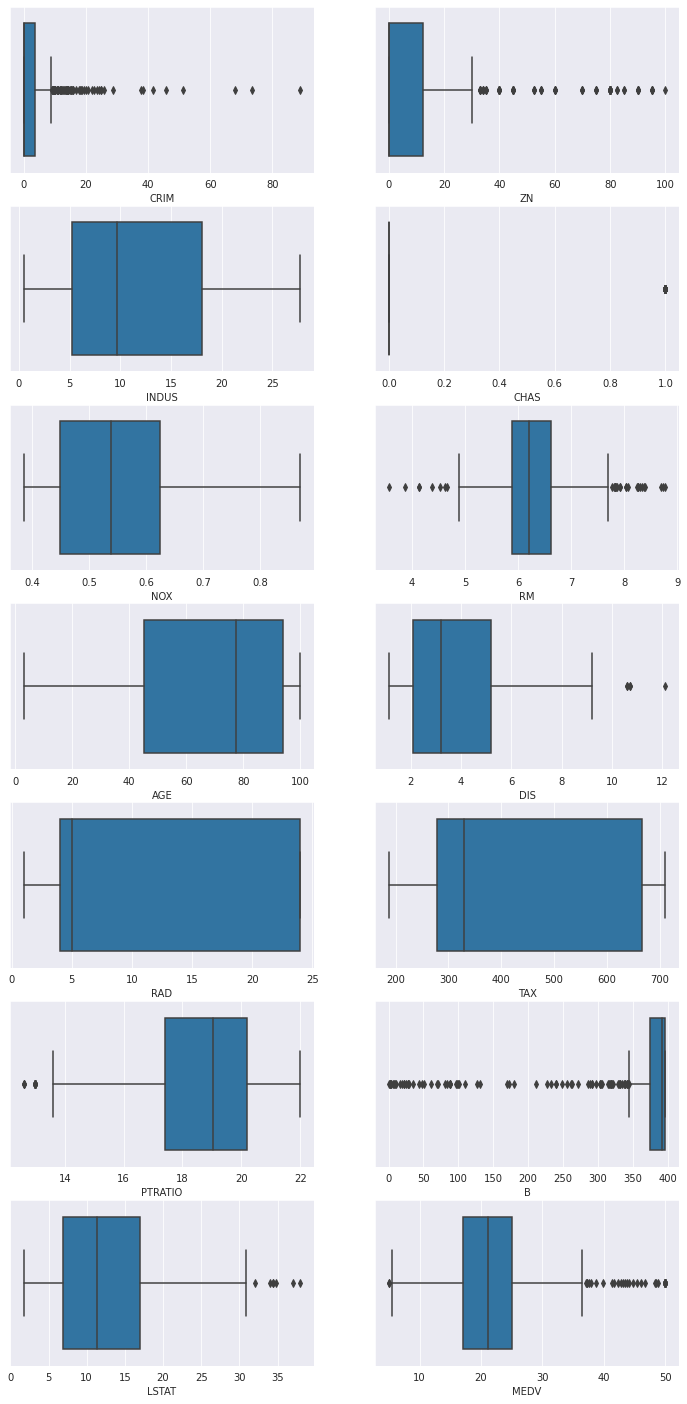

In [9]:
def visualize_outliers(df):
  fig, axes = plt.subplots(nrows=7, 
                           ncols=2,
                           figsize=(12, 25))
  axes = axes.flatten()
  index = 0
  for x in df.columns:
    sns.boxplot(x=x, data=df, ax=axes[index])
    index += 1

  plt.show()

visualize_outliers(df)

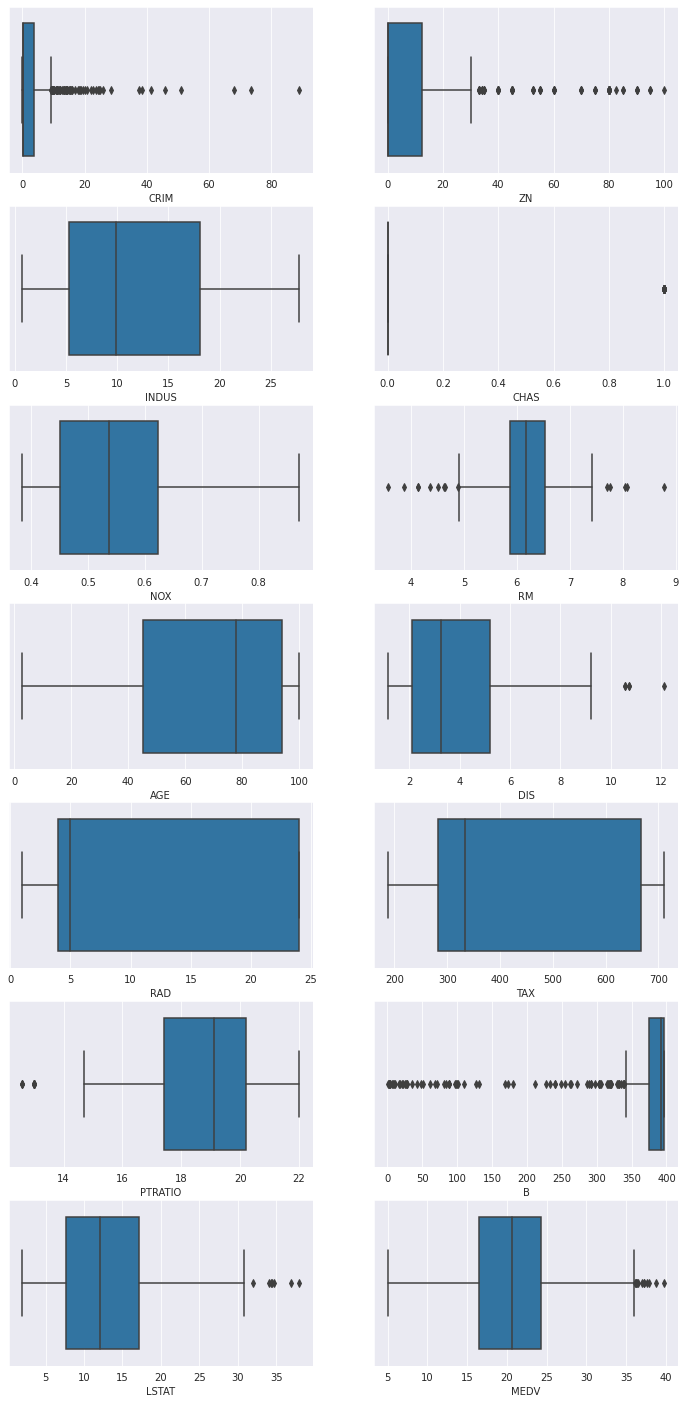

In [10]:
df_cleaned = df[df.MEDV <= 40]

visualize_outliers(df_cleaned)

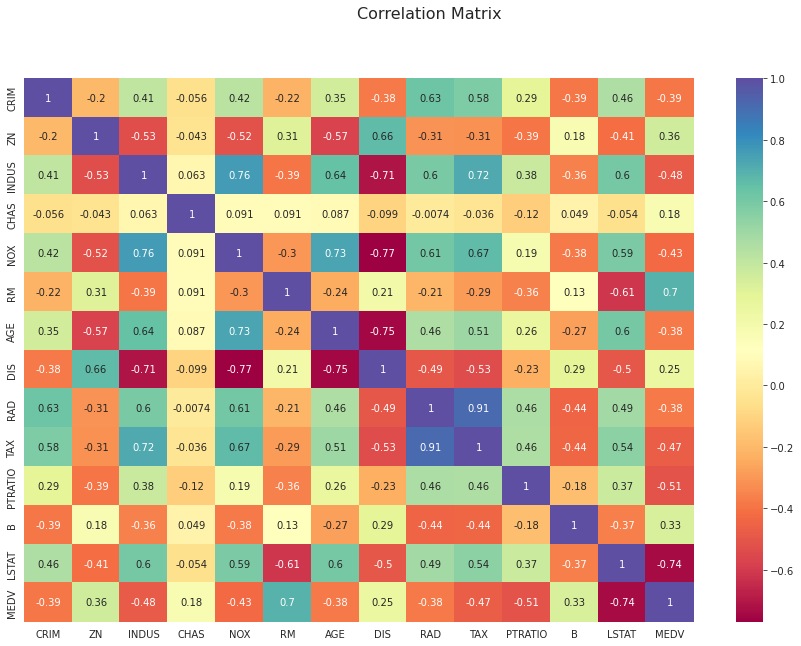

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Correlation Matrix', size=16)
sns.heatmap(df.corr(), cmap='Spectral', annot=True, ax=ax)
plt.show()

In [12]:
df = df_cleaned.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'B'], axis=1)

df.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


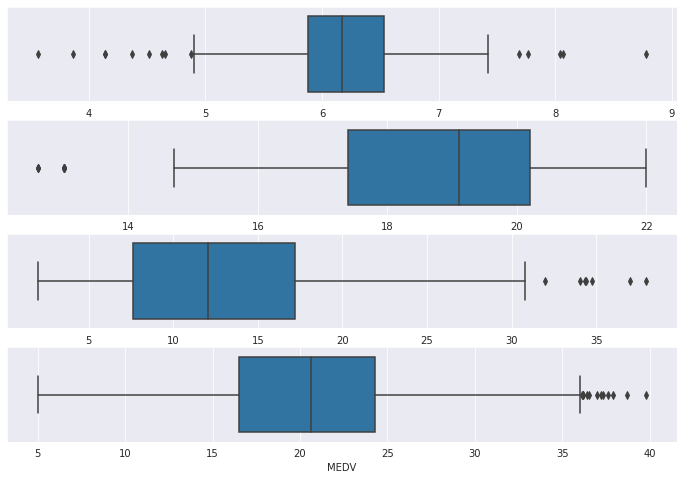

In [13]:
def plot_distribution(df):
  fig, axes = plt.subplots(nrows=4, 
                         figsize=(12, 8))
  index = 0
  for x in df.columns:
      sns.boxplot(x=x, data=df, ax=axes[index])
      index += 1

  plt.show()

plot_distribution(df)

In [14]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
interquantile = q3 - q1

interquantile

RM         0.655
PTRATIO    2.800
LSTAT      9.565
MEDV       7.800
dtype: float64

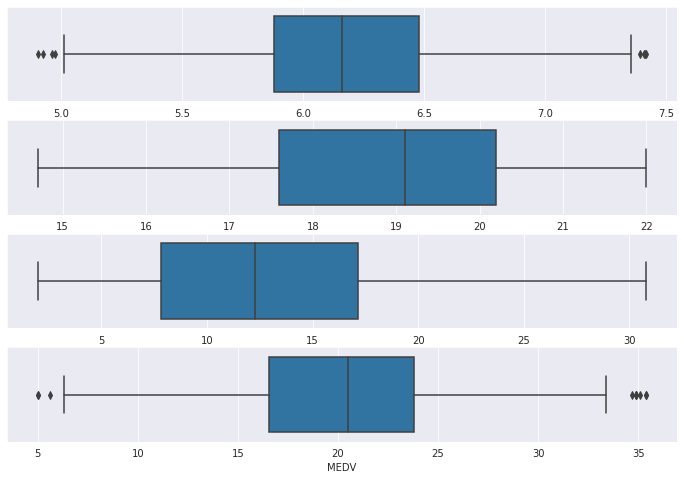

In [15]:
df_cleaned = df[~((df < (q1 - 1.5 * interquantile)) | (df > (q3 + 1.5 * interquantile))).any(axis=1)]

plot_distribution(df_cleaned)

### Data Preprocessing

In [16]:
X = df_cleaned.drop('MEDV', axis=1)
y = df_cleaned.MEDV

In [17]:
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
5,6.430,18.7,5.21


In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (329, 3)
X_test shape: (110, 3)
y_train shape: (329,)
y_test shape: (110,)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [21]:
X_train_scaled[:10]

array([[-0.81248541,  0.80949527,  0.18957107],
       [ 1.65554857,  0.02155461, -1.57119898],
       [-0.96944824,  1.22973029, -0.31608597],
       [-0.2383319 ,  0.80949527,  0.19860066],
       [-0.47584145,  0.54684838,  0.15947244],
       [-1.13260697,  0.80949527,  0.10830476],
       [ 0.47419674,  0.49431901, -0.93009809],
       [ 1.87447041, -0.03097477, -0.8021789 ],
       [-0.2156136 , -0.45120979,  0.55827933],
       [-0.2342013 ,  0.49431901, -0.08884129]])

In [22]:
X_test_scaled[:10]

array([[ 9.67059987e-01, -2.46866162e-01, -5.30608428e-01],
       [-7.05482503e-01, -9.02010978e-02, -5.63998058e-01],
       [ 1.18427330e+00,  6.93124225e-01,  1.68423699e+00],
       [ 1.96865470e+00, -1.44796499e+00, -1.35050933e+00],
       [-1.09405298e+00,  6.93124225e-01,  9.21840449e-01],
       [-4.78615268e-01,  6.93124225e-01, -5.28753449e-01],
       [-9.25109295e-01, -1.42422786e-01,  1.09806349e+00],
       [ 1.66749612e-03,  6.64639668e-02, -8.58939784e-01],
       [ 1.02981050e+00,  1.11089773e+00, -4.58264231e-01],
       [ 1.51303332e-01,  6.93124225e-01,  1.35329180e-01]])

In [23]:
y_train = y_train.to_numpy()

y_train[:10]

array([16.8, 33.4, 18.2, 20. , 16. , 20.8, 23.8, 33. , 18.7, 22.2])

### Modeling

In [24]:
def predict(weight, X, bias):
  y_pred = []
  for i in range(len(X)):
    y_pred.append(np.dot(weight, X[i]) + bias)
  return np.array(y_pred)

def derivative_weight(X, y, y_pred):
  m = len(y)
  sum = 0
  for i in range(m):
    sum += -X[i] * (y[i] - y_pred[i])
  return (2 / m) * sum

def derivative_bias(y, y_pred):
  m = len(y)
  sum = 0
  for i in range(m):
    sum += -(y[i] - y_pred[i])
  return (2 / m) * sum

def mse(y, y_pred):
  return np.square(np.subtract(y, y_pred)).mean()

def gradient_descent(X, y, learning_rate=0.01, epochs=150):
  weight = np.random.randn(X.shape[1])
  bias = 0
  error = []
  for _ in range(epochs):
    y_pred = predict(weight, X, bias)
    weight = weight - learning_rate * derivative_weight(X, y, y_pred)
    bias = bias - learning_rate * derivative_bias(y, y_pred)
    error.append(mse(y, y_pred))
  sns.lineplot(x=np.arange(1, epochs), y=error[1:])
  plt.xlabel('Number of Epochs')
  plt.ylabel('Error/Loss')
  plt.show()
  return weight, bias

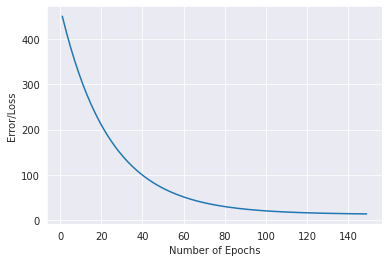

Weight: [ 1.66341682 -1.72015312 -3.31193876]
Bias: 19.439927806800576


In [25]:
weight, bias = gradient_descent(X_train_scaled, y_train)
print(f'Weight: {weight}')
print(f'Bias: {bias}')

### Model Prediction

In [26]:
y_pred = []
for i in range(len(X_test_scaled)):
  y_pred.append(np.dot(weight, X_test_scaled[i]) + bias)

In [27]:
results_df = pd.DataFrame({
    'y_test': y_test.reset_index(drop=True),
    'y_pred': np.round(y_pred, 2)
})

results_df

,y_test,y_pred
0,23.8,23.23
1,20.3,20.29
2,17.2,14.64
3,33.1,29.68
4,15.1,13.37
...,...,...
105,11.8,12.15
106,21.4,17.90
107,17.5,15.27
108,23.2,17.97


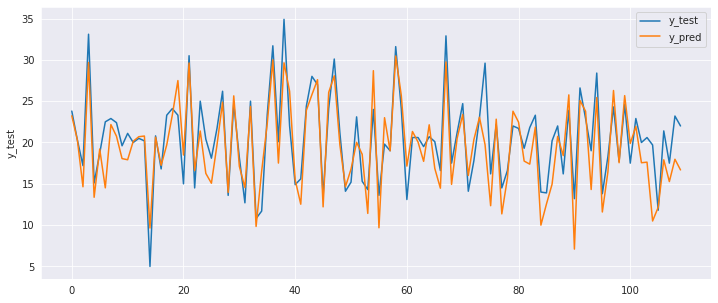

In [28]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=np.arange(0, 110), y=results_df['y_test'], label='y_test')
sns.lineplot(x=np.arange(0, 110), y=results_df['y_pred'], label='y_pred')
plt.legend()
plt.show()

In [29]:
print(f'Loss: {mse(y_test, y_pred)}')

Loss: 8.6361792917725
